<a href="https://colab.research.google.com/github/sharmavickram/AI_ML/blob/main/k_means_clustering_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment:**
**Perform K-means and K-medoid clustering on the given dataset “iris.csv”.**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

[[1](https://en.wikipedia.org/wiki/Iris_flower_data_set#:~:text=The%20Iris%20flower%20data%20set,example%20of%20linear%20discriminant%20analysis.)] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.

[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

[3] Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

This study we try to clustering Iris Dataset used Kmeans

[Attribute Information:
](https://archive.ics.uci.edu/ml/datasets/iris)
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

**Import required libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

**load the dataset from local source/github/onedrive**

In [72]:
iris = pd.read_csv("/content/Iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values



In [73]:
# summary of the DataFrame, including information about the columns, data types, memory usage, and presence of missing values.
iris.info()
iris[0:15]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [74]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [75]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

**Distribution plots**


**plot each flower to a histogram**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

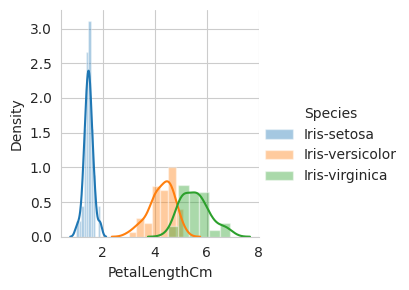

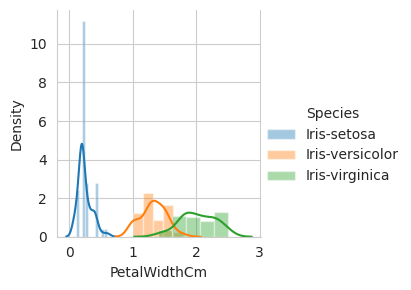

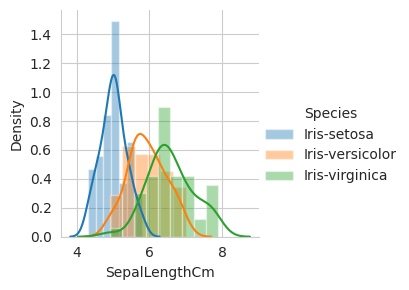

In [76]:
sns.FacetGrid(iris,hue="Species").map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species").map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species").map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

**box plot**

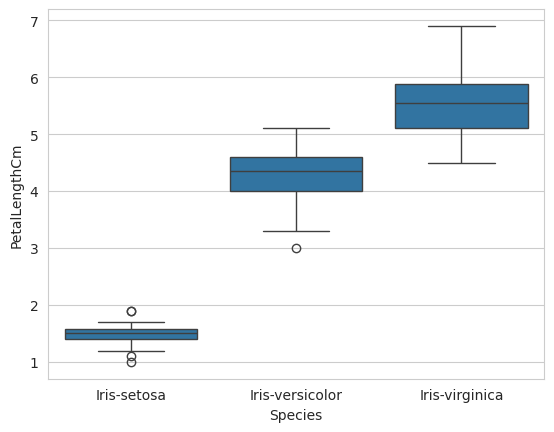

In [77]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

**violin plot**

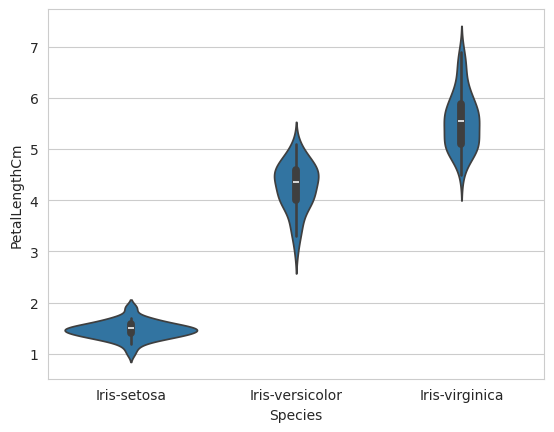

In [78]:
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

**Scatter plot**


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


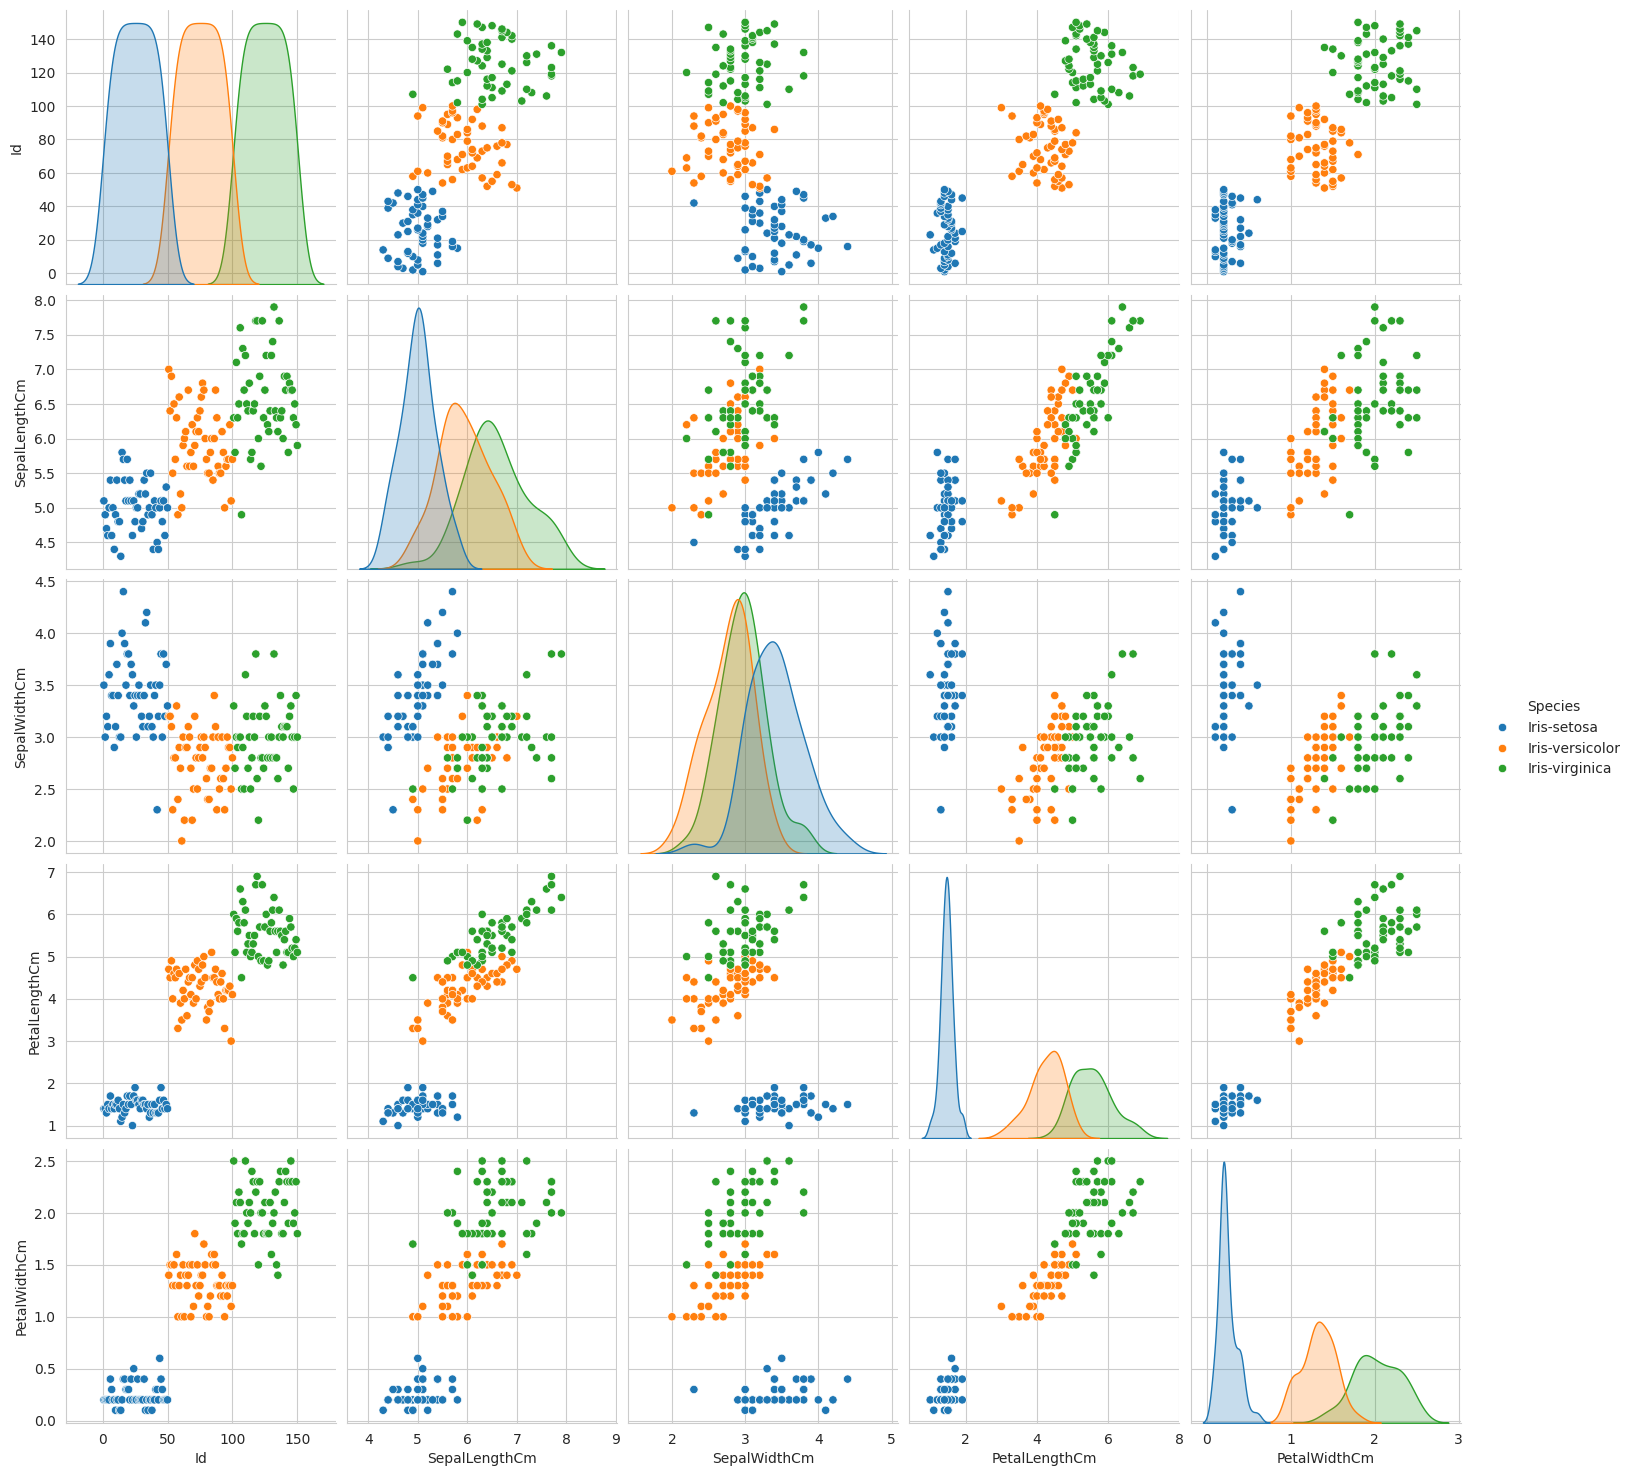

In [79]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",size=3);
plt.show()


# **K-Means**

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

#  Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4


In [80]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means

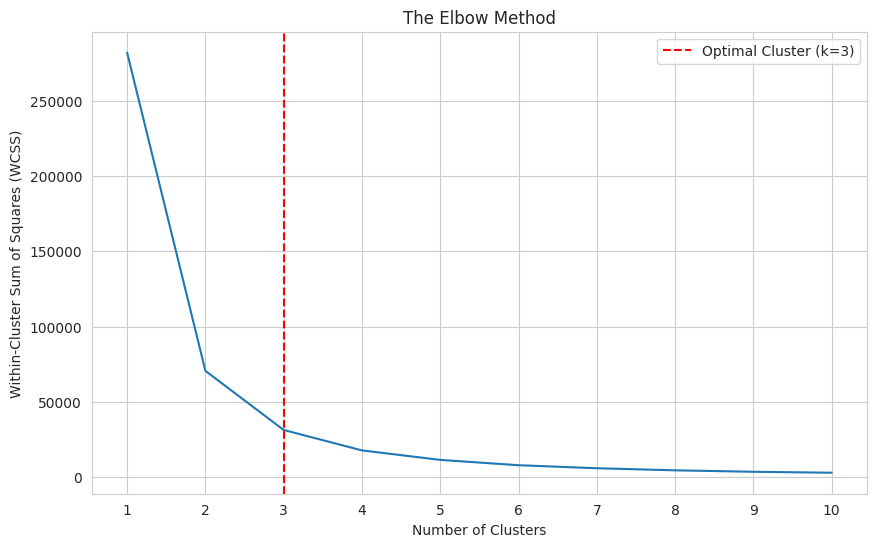

In [81]:
optimal_k=3
plt.figure(figsize=(10, 6))  # Set the figure size wider

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))  # Set x-axis ticks to integer values from 1 to 10
plt.grid(True)

# Highlight optimal number of clusters
plt.axvline(x=optimal_k, color='r', linestyle='--', label='Optimal Cluster (k={})'.format(optimal_k))
plt.legend()

plt.show()


# Implementing K-Means Clustering

In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

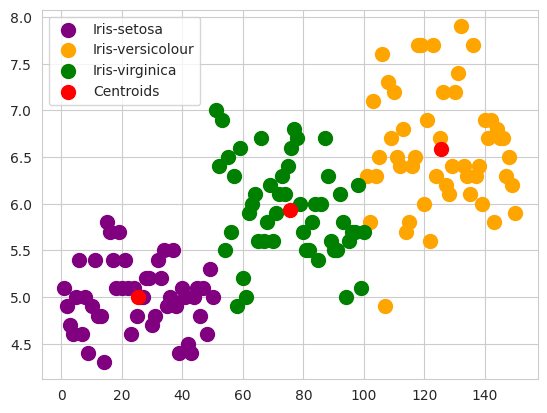

In [83]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [84]:
# Print centroid values
print("Centroid values:")
for centroid in kmeans.cluster_centers_:
    print(centroid)


Centroid values:
[25.5    5.006  3.418  1.464]
[125.5     6.588   2.974   5.552]
[75.5    5.936  2.77   4.26 ]


In [85]:
# Print data points for each cluster
for cluster_label in range(kmeans.n_clusters):
    cluster_points = x[y_kmeans == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_points)


Cluster 0:
[[ 1.   5.1  3.5  1.4]
 [ 2.   4.9  3.   1.4]
 [ 3.   4.7  3.2  1.3]
 [ 4.   4.6  3.1  1.5]
 [ 5.   5.   3.6  1.4]
 [ 6.   5.4  3.9  1.7]
 [ 7.   4.6  3.4  1.4]
 [ 8.   5.   3.4  1.5]
 [ 9.   4.4  2.9  1.4]
 [10.   4.9  3.1  1.5]
 [11.   5.4  3.7  1.5]
 [12.   4.8  3.4  1.6]
 [13.   4.8  3.   1.4]
 [14.   4.3  3.   1.1]
 [15.   5.8  4.   1.2]
 [16.   5.7  4.4  1.5]
 [17.   5.4  3.9  1.3]
 [18.   5.1  3.5  1.4]
 [19.   5.7  3.8  1.7]
 [20.   5.1  3.8  1.5]
 [21.   5.4  3.4  1.7]
 [22.   5.1  3.7  1.5]
 [23.   4.6  3.6  1. ]
 [24.   5.1  3.3  1.7]
 [25.   4.8  3.4  1.9]
 [26.   5.   3.   1.6]
 [27.   5.   3.4  1.6]
 [28.   5.2  3.5  1.5]
 [29.   5.2  3.4  1.4]
 [30.   4.7  3.2  1.6]
 [31.   4.8  3.1  1.6]
 [32.   5.4  3.4  1.5]
 [33.   5.2  4.1  1.5]
 [34.   5.5  4.2  1.4]
 [35.   4.9  3.1  1.5]
 [36.   5.   3.2  1.2]
 [37.   5.5  3.5  1.3]
 [38.   4.9  3.1  1.5]
 [39.   4.4  3.   1.3]
 [40.   5.1  3.4  1.5]
 [41.   5.   3.5  1.3]
 [42.   4.5  2.3  1.3]
 [43.   4.4  3.2  1.3]


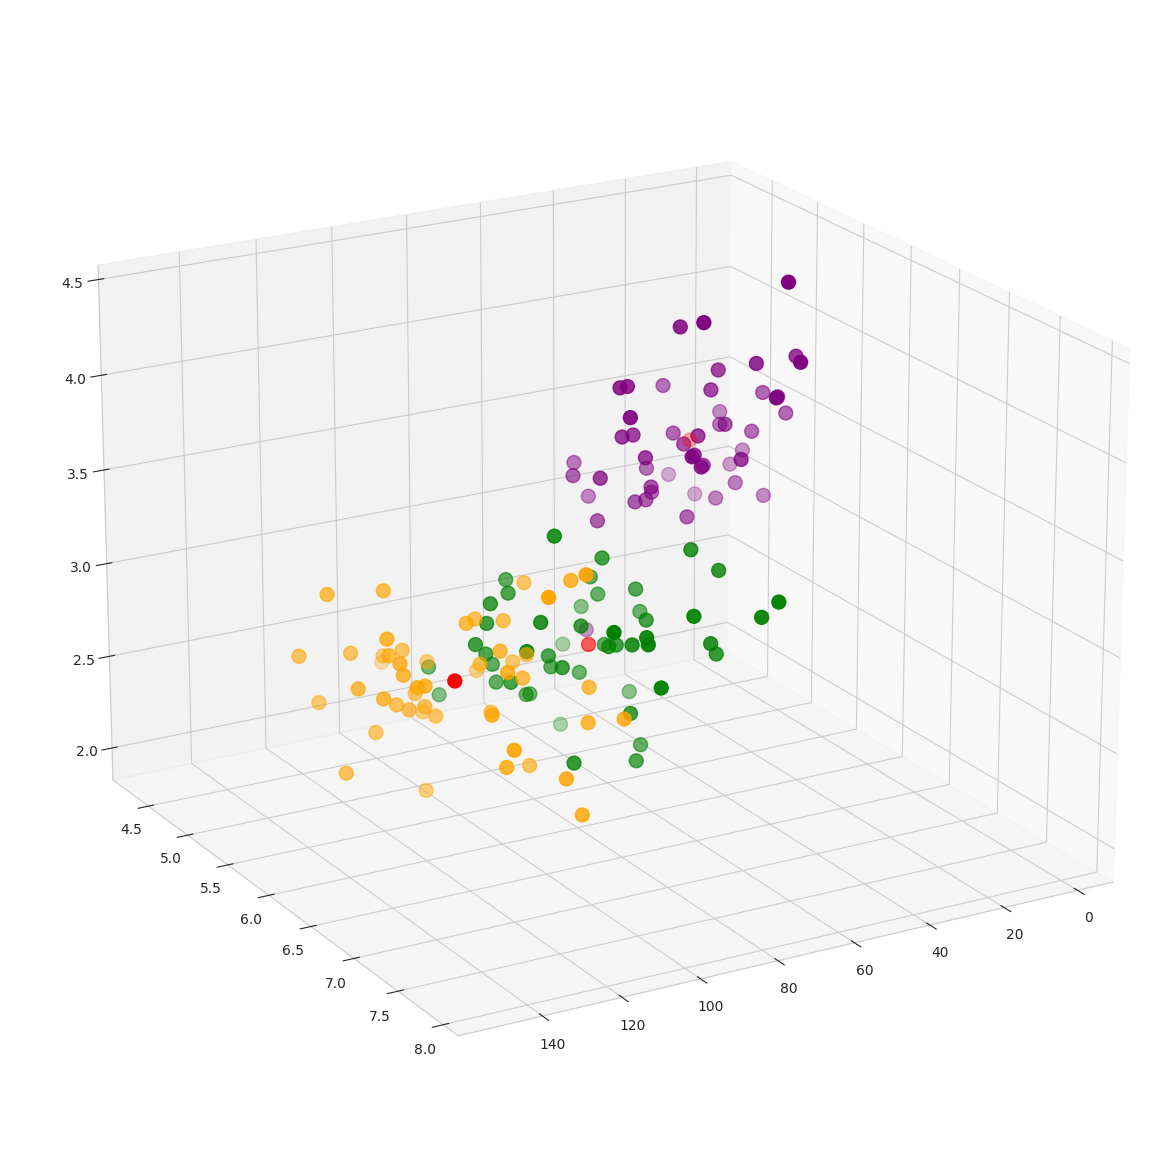

In [86]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s=100, c='purple', label='Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s=100, c='orange', label='Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')

# Adjusting view angle to center the plot
ax.view_init(elev=20, azim=60)  # Adjust these angles to center the plot
plt.show()



In [87]:
!pip install scikit-learn-extra

In [88]:
from sklearn.metrics import pairwise_distances_argmin_min


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
print("X", X_scaled)


X [[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]
 [-1.60506942 -0.53717756  1.95766909 -1.17067529]
 [-1.58197489 -1.50652052  0.80065426 -1.3412724 ]
 [-1.55888037 -1.02184904  0.80065426 -1.2844067 ]
 [-1.53578584 -1.74885626 -0.35636057 -1.3412724 ]
 [-1.51269132 -1.14301691  0.10644536 -1.2844067 ]
 [-1.4895968  -0.53717756  1.49486315 -1.2844067 ]
 [-1.46650227 -1.26418478  0.80065426 -1.227541  ]
 [-1.44340775 -1.26418478 -0.1249576  -1.3412724 ]
 [-1.42031323 -1.87002413 -0.1249576  -1.51186952]
 [-1.3972187  -0.05250608  2.18907205 -1.45500381]
 [-1.37412418 -0.17367395  3.11468391 -1.2844067 ]
 [-1.35102965 -0.53717756  1.95766909 -1.39813811]
 [-1.32793513 -0.90068117  1.03205722 -1.3412724 ]
 [-1.30484061 -0.17367395  1.72626612 -1.17067529]
 [-1.28174608 -0.90068117  1.

In [90]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # trying different values of k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the elbow method graph
plt.figure(figsize=(12, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [114]:
optimal_k = 3  # From the elbow method, it seems that 3 clusters is a good choice which is highlighted
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
print("Number of clusters:", optimal_k)
print("K-means cluster centers:")
print(kmeans.cluster_centers_)
print("K-means labels for each data point:")
print(kmeans.labels_)

Number of clusters: 3
K-means cluster centers:
[[ 0.11643489 -0.128236   -0.88183813  0.25333671]
 [-1.16250293 -1.00206653  0.89510445 -1.30297509]
 [ 0.96931639  1.04257713 -0.02890354  0.97520033]]
K-means labels for each data point:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [116]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Calculate SSE (Sum of Squared Errors)
kmeans_sse = kmeans.inertia_
print("K-means SSE:", kmeans_sse)


K-means SSE: 162.42704704348435


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
print("K-means SSE:", kmeans_sse)

K-means SSE: 162.42704704348435


# **K-medoid**

In [96]:
!pip install scikit-learn-extra


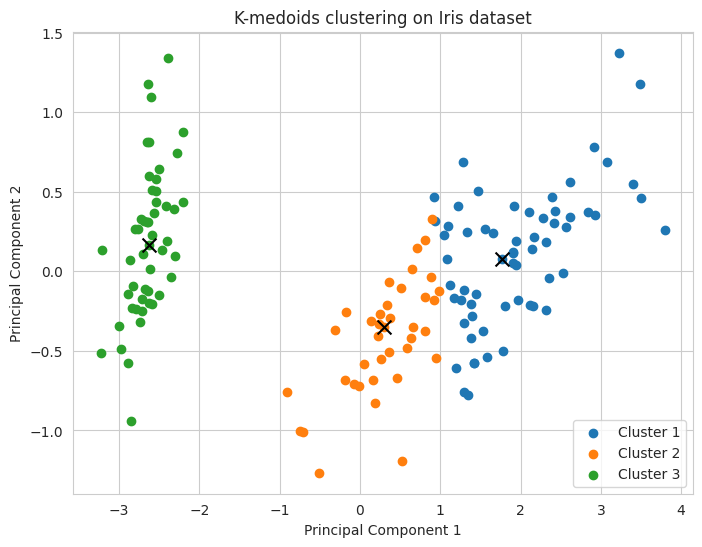

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Initialize KMedoids with 3 clusters (since there are 3 species in Iris dataset)
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(X)

# Get cluster labels and medoid indices
cluster_labels = kmedoids.labels_
medoid_indices = kmedoids.medoid_indices_

# Plot the clusters
plt.figure(figsize=(8, 6))

for i in range(3):
    # Plot points for each cluster
    plt.scatter(X_reduced[cluster_labels == i, 0], X_reduced[cluster_labels == i, 1], label=f'Cluster {i+1}')

    # Highlight medoids
    plt.scatter(X_reduced[medoid_indices[i], 0], X_reduced[medoid_indices[i], 1], s=100, c='black', marker='x')

plt.title('K-medoids clustering on Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [100]:
# Count the number of data points in each cluster
cluster_counts = np.bincount(cluster_labels)

print("Number of data points in each cluster:")
for i in range(3):
    print(f"Cluster {i+1}: {cluster_counts[i]}")


Number of data points in each cluster:
Cluster 1: 62
Cluster 2: 38
Cluster 3: 50


In [102]:
import numpy as np
from scipy.spatial.distance import euclidean

def kmedoids(X, k, max_iterations=100):
    # Randomly initialize k medoid indices
    medoid_indices = np.random.choice(len(X), size=k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iterations):
        # Assign each data point to the nearest medoid
        clusters = [[] for _ in range(k)]
        for i, x in enumerate(X):
            distances = [euclidean(x, m) for m in medoids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)

        # Update medoids by selecting the data point with the minimum total distance to other points in the cluster
        for i, cluster in enumerate(clusters):
            cluster_distances = np.zeros(len(cluster))
            for j, x_idx in enumerate(cluster):
                cluster_distances[j] = np.sum([euclidean(X[x_idx], X[x_other_idx]) for x_other_idx in cluster])
            new_medoid_idx = cluster[np.argmin(cluster_distances)]
            medoids[i] = X[new_medoid_idx]

        # If medoids do not change, stop iteration
        if np.array_equal(X[medoid_indices], medoids):
            break

    # Assign each data point to the final medoid
    final_clusters = [0] * len(X)
    for i, cluster in enumerate(clusters):
        for idx in cluster:
            final_clusters[idx] = i

    return final_clusters, medoids

# Applying K-medoids on Iris dataset
cluster_labels, final_medoids = kmedoids(X, k=3)

# Count the number of data points in each cluster
cluster_counts = np.bincount(cluster_labels)

print("Number of data points in each cluster:")
for i in range(3):
    print(f"Cluster {i+1}: {cluster_counts[i]}")


Number of data points in each cluster:
Cluster 1: 38
Cluster 2: 62
Cluster 3: 50


In [112]:
import numpy as np
from scipy.spatial.distance import euclidean

def kmedoids(X, k, max_iterations=100):
    # Randomly initialize k medoid indices
    medoid_indices = np.random.choice(len(X), size=k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iterations):
        # Assign each data point to the nearest medoid
        clusters = [[] for _ in range(k)]
        for i, x in enumerate(X):
            distances = [euclidean(x, m) for m in medoids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)

        # Update medoids by selecting the data point with the minimum total distance to other points in the cluster
        for i, cluster in enumerate(clusters):
            cluster_distances = np.zeros(len(cluster))
            for j, x_idx in enumerate(cluster):
                cluster_distances[j] = np.sum([euclidean(X[x_idx], X[X_other_idx]) for X_other_idx in cluster])
            new_medoid_idx = cluster[np.argmin(cluster_distances)]
            medoid_indices[i] = new_medoid_idx
            medoids[i] = X[new_medoid_idx]

        # If medoids do not change, stop iteration
        if np.array_equal(X[medoid_indices], medoids):
            break

    # Calculate SSE
    sse = 0
    for i, medoid_idx in enumerate(medoid_indices):
        cluster_points = X[clusters[i]]
        sse += np.sum(np.linalg.norm(cluster_points - X[medoid_idx], axis=1) ** 2)

    return clusters, medoid_indices, sse

# Applying K-medoids on Iris dataset
clusters, final_medoid_indices, sse = kmedoids(X, k=3)

print("Sum of Squared Error (SSE):", sse)


Sum of Squared Error (SSE): 153.33


The Sum of Squared Error (SSE) for K-means and K-medoids clustering algorithms measures the within-cluster variance or the total squared distance of data points to their respective cluster centroids (or medoids). However, the algorithms themselves and the way they optimize the SSE differ, leading to potential differences in the SSE values obtained.

Here's a brief comparison:                                                     
**K-means:**

*   In K-means, the centroids are typically the mean of the data points within each cluster.
*   The algorithm aims to minimize the sum of squared distances between each data point and its nearest centroid.
*   It iteratively assigns data points to the nearest centroid and updates the centroids to minimize the total within-cluster variance.
*   The final centroids are the points that minimize the total squared distance to all points within their respective clusters.

**K-medoids:**
*   In K-medoids, the medoids are actual data points within each cluster.
*   The algorithm aims to minimize the sum of squared distances between each data point and its nearest medoid.
*   It iteratively assigns data points to the nearest medoid and updates the medoids to minimize the total within-cluster variance.
*   The final medoids are the data points that minimize the total squared distance to all other points within their respective clusters.

In summary, while both algorithms aim to minimize the within-cluster variance (measured by SSE), K-means uses centroid coordinates (mean of points) for optimization, while K-medoids uses actual data points (medoids) for optimization. This difference in optimization strategies can lead to different SSE values between the two algorithms, even when applied to the same dataset. Additionally, since K-medoids uses actual data points as medoids, it tends to be more robust to outliers compared to K-means.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

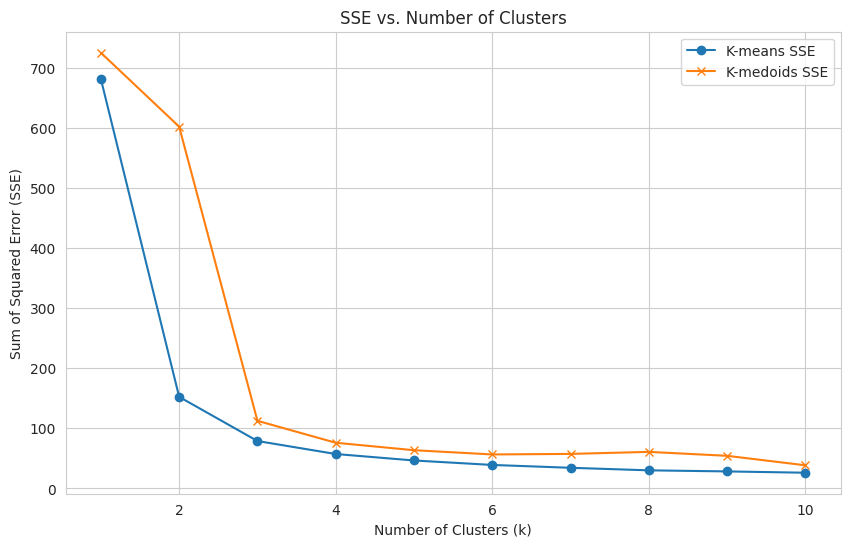

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import datasets

# Load the Iris dataset
X = iris.data  # Features

# Calculate SSE for K-means clustering
kmeans_sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    kmeans_sse.append(kmeans.inertia_)

# Calculate SSE for K-medoids clustering
kmedoids_sse = []
for k in range(1, 11):
    _, _, sse = kmedoids(X, k=k)
    kmedoids_sse.append(sse)

# Plot SSE graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), kmeans_sse, marker='o', label='K-means SSE')
plt.plot(range(1, 11), kmedoids_sse, marker='x', label='K-medoids SSE')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.legend()
plt.grid(True)
plt.show()
